# Project 2: Public health in Scotland

(Investigating Scottish Public Health Through GP Practice Data)\
Github repository: https://github.com/pypr23/project-2-project2_g52.git

## Importing Necessary Libraries

In this section, we import all the necessary libraries that are required for our data analysis and visualization tasks.

In [1]:
## Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## 1 Introduction

### 1.1 Background

Scotland, like many other nations, faces a variety of public health challenges that impact the well-being of its population. In addressing these issues, the role of General Practitioners (GPs) becomes increasingly significant. GPs, or general practitioners, are often the first point of contact in the healthcare system for individuals seeking medical attention for non-emergency health concerns.

The Scottish government publishes extensive data concerning public health, including detailed information about GP practices across the country. This project aims to delve into this wealth of data to explore and analyze trends, challenges, and opportunities within the Scottish healthcare system, particularly focusing on GP practices.

By examining this data, we seek to answer pertinent questions related to public health in Scotland. Our investigation will encompass a range of aspects including …….(the distribution of GP practices, patient demographics, healthcare access, and the variety of services offered). The insights gained from this analysis could be instrumental in enhancing healthcare delivery, policy-making, and in addressing the specific healthcare needs of the Scottish population.

We set the foundation for a comprehensive analysis of Scotland's public health landscape through the lens of GP practices.

## 2 Analyzing GP Demographic Data

This script analyzes GP demographic data for `Total patients of all NHS boards` and `Number of patients of all age groups` in the NHS board with the `largest` number of patients, sourced from Public Health Scotland.

#### 2.1 Data Source
The data is loaded from an Excel file hosted on the Public Health Scotland website, containing demographic information categorized by NHS boards and age groups.

#### 2.2 Key Features of the Script

1. **Data Loading and Filtering**:
  - Data is loaded using `pandas.read_excel`.  
  - Focus is specifically on data from the year 2022, filtering out other years.

2. **Data Aggregation**:
  - Calculates the total number of patients for each NHS board.

3. **Data Visualization**:
  - Creates two main visualizations using `matplotlib` and `seaborn`:
      - A bar chart showing the total number of patients for each NHS board.
      - A horizontal bar chart showing the number of patients across different age groups, further categorized by gender.

4. **Customization**:
  - Enhances readability with custom labels, titles, and colors.
  - Adds a line plot overlay on the age group chart for a clearer representation of total patients across different age groups.


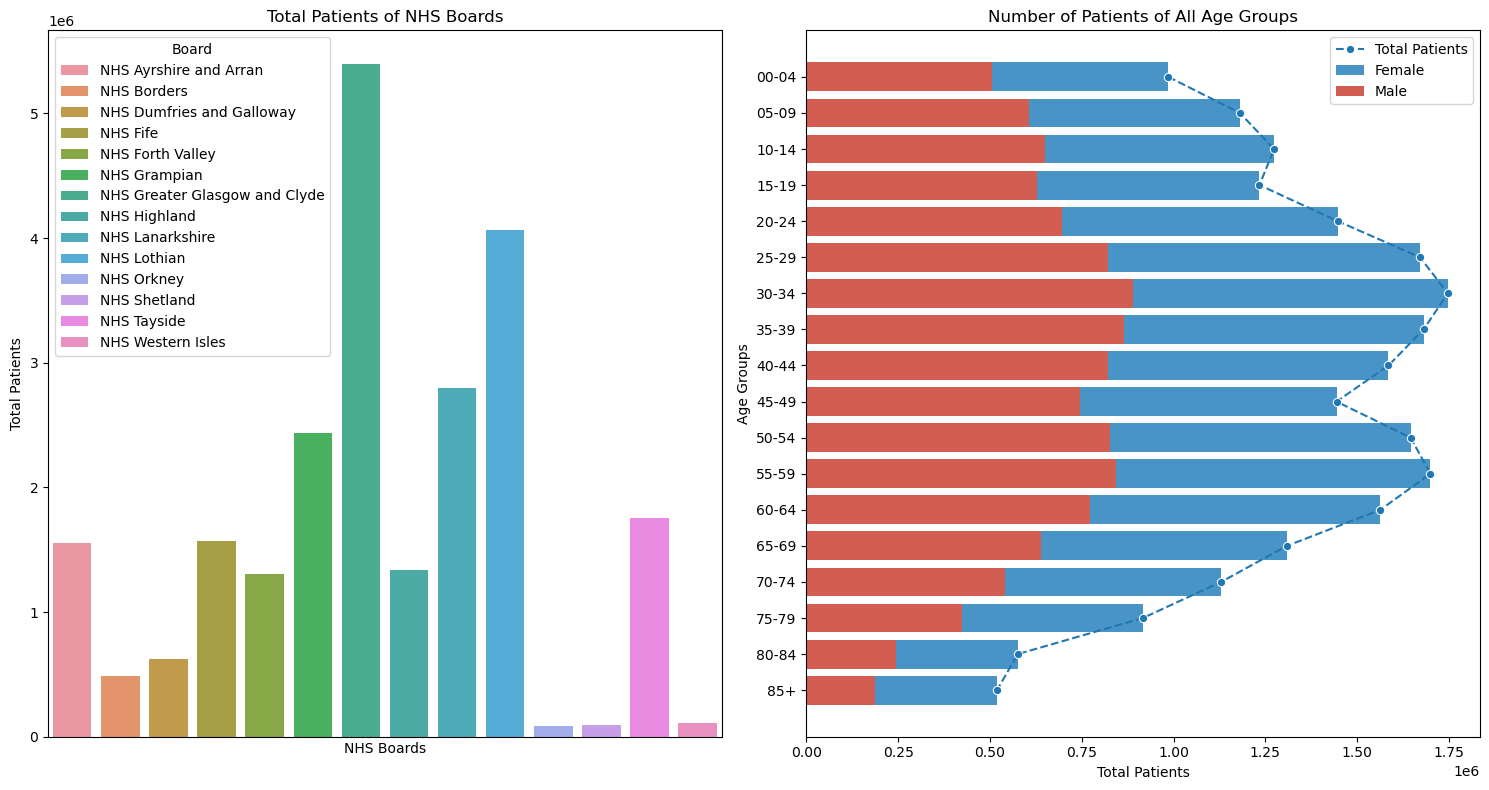

In [2]:
# Load demographics data
demo = pd.read_excel("https://publichealthscotland.scot/media/22255/demographics_2023_q1.xlsx", sheet_name="Age-Gender")

# Set the name of quarters
quarters = ['2022/23 (Q1) Apr - Jun', '2022/23 (Q2) Jul - Sep', '2022/23 (Q3) Oct - Dec', '2022/23 (Q4) Jan - Mar']

# Get the demographics data for 2022
demo_2022 = demo[demo['Quarter'].isin(quarters)]

# Plot 1 - Total Patients of NHS Boards
tot_pat = demo_2022.groupby('Board')['Total Patients'].sum()
tot_pat_df = pd.DataFrame({'Board': tot_pat.index, 'Total Patients': tot_pat.values})

fig, axes = plt.subplots(1, 2, figsize=(15, 8))

sns.barplot(data=tot_pat_df, x="Board", y="Total Patients", hue="Board", ax=axes[0], dodge=False)
axes[0].set_xticks([])
axes[0].set_title("Total Patients of NHS Boards")
axes[0].set_ylabel("Total Patients")
axes[0].set_xlabel("NHS Boards")

# Plot 2 - Number of Patients of All Age Groups
all_age = demo_2022.groupby('AgeGroup')['Total Patients'].sum()
male_age = demo_2022[demo_2022['Sex'] == "Male"].groupby('AgeGroup')['Total Patients'].sum()

# Create a DataFrame for age group data
data_age = {
    'AgeGroup': demo_2022["AgeGroup"].unique(),
    'Total Patients': all_age.values,
    'Total Male Patients': male_age.values
}

all_age_df = pd.DataFrame(data_age)

# Subplot for Age Group plot (horizontal)
sns.barplot(data=all_age_df, y="AgeGroup", x="Total Patients", color='#3498db', ax=axes[1], label="Female", orient='h')

# Subplot for Age Group plot (horizontal)
sns.barplot(data=all_age_df, y="AgeGroup", x="Total Male Patients", color='#e74c3c', ax=axes[1], label="Male", orient='h')

# Line plot for Total Patients
sns.lineplot(data=all_age_df, x="Total Patients", y='AgeGroup', marker='o', ax=axes[1], label="Total Patients",
             linestyle='dashed', orient='y')

# Axes settings for the Age Group plot
ax = axes[1]
ax.set_title("Number of Patients of All Age Groups")
ax.set_ylabel("Age Groups")
ax.set_xlabel("Total Patients")

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()


### 2.3 Results and Reasons

#### 2.3.1 Results
1. The data shows that the NHS Greater Glasgow and Clyde board has the highest number of patients among all NHS boards.

2. The age group of 25-40 years shows the largest number of patients, with a nearly equal ratio of males to females.

#### 2.3.2 Reasons

1. High Patient Numbers in NHS Greater Glasgow and Clyde board

- **Population Scale**: 
 Glasgow, being a major urban area, has a larger population. This naturally leads to a higher number of patients due to the sheer scale of the population.
   
- **Concentration of Medical Resources**: 
Glasgow, as a central urban area, has a concentration of medical resources and facilities. This can attract more patients from surrounding areas, contributing to higher patient numbers.

2. High Patient Numbers in the 25-40 Age Group in Glasgow

- **Economic and Work-Related Stress**: 
Individuals in this age group are often in the midst of their careers, facing significant work-related stress and lifestyle pressures. This can lead to a range of health issues, necessitating medical attention.

- **Lifestyle Choices**: 
The 25-40 age bracket is typically characterized by certain lifestyle habits, such as diet, exercise, and social activities, which can significantly impact health. These lifestyle choices may lead to an increased need for medical services.



## 3 Interactive Map of Disease Prevalence in Scotland's NHS Boards (2022)
This part aims to visualize the prevalence of various diseases across the NHS Boards in Scotland for the year 2022. 

### 3.1 Data Source

**Disease Prevalence Data**: The data is sourced from an Excel file hosted on the Public Health Scotland website, which contains detailed information about the prevalence of different diseases across various NHS Boards in Scotland.

### 3.2 Key Features of the Script

1. **Data Filtering**

- The analysis is focused on the data from the year 2022, and it specifically targets information across all age groups.

- Relevant Columns Extraction: Columns related to the prevalence rates of different diseases are extracted for further analysis.

2. **Geographical Data Handling**

- Shapefile Loading: A Shapefile (`SG_NHS_HealthBoards_2019.shp`) containing the geographical boundaries of NHS Health Boards in Scotland is loaded. This file is crucial for mapping the prevalence data to specific regions.
- Initial Disease Selection: The first disease from the dataset is chosen as the default for initial visualization.

3. **Interactive Map Creation**

- Map Plotting: Using `Geopandas` and `Matplotlib`, an interactive map of Scotland's NHS Health Boards is created. The map is color-coded based on the prevalence rates of the selected disease.

- Dropdown Menu for Disease Selection: A dropdown menu is implemented, allowing users to select different diseases from the dataset. Changing the selection dynamically updates the map to reflect the prevalence rates of the chosen disease.

- Update Function: The `update_map` function is responsible for updating the map based on the user's selection. It recalculates the prevalence rates and adjusts the color coding on the map accordingly.

4. **Customization and Visualization**

- Map Customization: The appearance of the map, including border styles and colors, is customized for enhanced visual appeal.

- Interactive Functionality: The `interact` function from the `ipywidgets` library connects the dropdown menu with the `update_map` function, enabling interactive updates to the map.


In [3]:
## Plot the map of disease prevalence
LB = pd.read_excel('https://publichealthscotland.scot/media/21136/diseaseprevalence_board_total.xlsx', sheet_name = 'DP_Board_total')

# Get the disease prevalence in 2022
LB_2022 = LB.loc[LB['Year'] == 2022]

# Get the data of all age-groups
LB_2022_all = LB_2022.loc[LB_2022['Age'] == 'All']
LB_2022_rate = LB_2022_all.iloc[:,list(range(5)) + list(range(44, 63))]

# Load the shapefile for Scotland(from https://www.spatialdata.gov.scot/)
scotland = gpd.read_file('SG_NHS_HealthBoards_2019.shp')

# Sample data for diseases
diseases = list(LB_2022_all.keys()[44:63])

# Initial disease selection
selected_disease = diseases[0]

rate = LB_2022_rate[selected_disease]
rate = np.array(rate)
# Indices to insert elements
indices_to_insert = [0, 1, 1]

# Values to insert
values_to_insert = [np.nan, np.nan, np.nan]

# Insert elements into the array
rate = np.insert(rate, indices_to_insert, values_to_insert)

# Create a new column for color (you may adjust this based on your data)
# For example, you can assign different colors based on some attribute like population, area, etc.
scotland['color'] = rate

# Function to update the map based on the selected disease
def update_map(disease):
    # Update color column based on the selected disease
    global selected_disease
    selected_disease = disease
    
    rate = LB_2022_rate[selected_disease]
    
    rate = np.array(rate)

    # Indices to insert elements
    indices_to_insert = [0, 1, 1]

    # Values to insert
    values_to_insert = [np.nan, np.nan, np.nan]

    # Insert elements into the array
    rate = np.insert(rate, indices_to_insert, values_to_insert)

    # Create a new column for color (you may adjust this based on your data)
    # For example, you can assign different colors based on some attribute like population, area, etc.
    scotland['color'] = rate

    # Plot the map with colored regions
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    scotland.plot(column='color', cmap='viridis', linewidth=0.3, ax=ax, edgecolor='0.5', legend=True)

    # Customize the plot (optional)
    ax.set_title(f'{selected_disease}')

    # Set the appearance of the axis as bold dashed lines with increased dash spacing
    ax.spines['top'].set_linestyle('dashed')
    ax.spines['top'].set_color('grey')   
    ax.spines['bottom'].set_linestyle('dashed')
    ax.spines['bottom'].set_color('grey')
    ax.spines['left'].set_linestyle('dashed')
    ax.spines['left'].set_color('grey') 
    ax.spines['right'].set_linestyle('dashed')
    ax.spines['right'].set_color('grey')
    # Turn off axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    # Show the plot
    plt.show()

# Create a dropdown widget for disease selection
disease_dropdown = widgets.Dropdown(
    options=diseases,
    value=selected_disease,
    description='Select Disease:'
)

# Use the interact function to connect the dropdown with the update_map function
output = interact(update_map, disease=disease_dropdown)


interactive(children=(Dropdown(description='Select Disease:', options=('Rate_Asthma', 'Rate_Atrial Fibrillatio…

### 3.3 Using the Interactive Map

1. **Disease Selection**: Users can select a particular disease from a dropdown menu. Upon selection, the map updates to display the prevalence rates of that disease across Scotland.

2. **Color Coding**: The map uses a color gradient from yellow to purple to represent the prevalence rates, where yellow indicates high prevalence and purple indicates very low prevalence.

3. **Observations**: Notably, diseases like dementia, depression, eating disorders, hypertension, osteoporosis, palliative care, and asthma show significant prevalence across many regions in Scotland.

### 3.4 Analysis of Prevalence Patterns

1. **Common Health Issues**:
The widespread prevalence of these diseases suggests they are common health issues in Scotland, possibly linked to lifestyle, environmental factors, or demographic profiles.

2. **Environmental and Lifestyle Factors**:
Urban areas like Glasgow and Lothian might have environmental and lifestyle factors contributing to higher rates of diseases like depression and hypertension.

3. **Aging Population**:
Diseases like dementia and osteoporosis are more prevalent in aging populations, which could be a factor in regions with a higher proportion of elderly residents.


## 4 Comprehensive Analysis of SIMD Data for NHS Health Boards

This project aims to analyze and visualize the SIMD (Scottish Index of Multiple Deprivation) data for specific NHS Health Boards in Scotland, focusing on NHS Greater Glasgow and Clyde and NHS Lothian, across different quarters of the year 2021/22.

### 4.1 Data Processing

- **Objective**: To process SIMD data for specified health boards and time periods, and to organize this data into a structured format for visualization.
- **Data Loading**: SIMD data is loaded from an Excel file hosted on the Public Health Scotland website.

##### 4.1.1 Data Processing Function: `process_SIMD_data`

- **Functionality**: This function filters and processes SIMD data for a given health board, year, and quarter. It checks for the 'Decile' column, processes it, and groups the data by 'Decile' to sum up numeric values.

##### 4.1.2 Data Organization

- **Dictionary Creation**: An empty dictionary `data_by_region` is created to store processed data for each region. The dictionary keys are the names of the health boards, and the values are DataFrames with quarters as columns.
- **Data Population**: The dictionary is populated with processed data for each board, year, and quarter. The data includes patient counts for each decile.

### 4.2 Heatmap Visualization

- **Plot Setup**: A series of heatmaps are created using Seaborn to visualize the patient data for each health board.
- **Heatmap Configuration**:
  - Each heatmap represents data from one health board.
  - The x-axis of the heatmap corresponds to quarters, and the y-axis corresponds to deciles.
  - The color intensity in the heatmap reflects the number of patients.
- **Layout Adjustment**: The layout is adjusted to neatly fit all subplots, ensuring clear visibility of each heatmap.

In [4]:
def process_SIMD_data(SIMD_HSCP, board_name, year, quarter):
    # Construct the query string for the specified quarter and year
    quarter_string = f'{year} (Q{quarter})'
    # Filter the data for the specified quarter
    SIMD_HSCP_quarter = SIMD_HSCP.loc[SIMD_HSCP['Quarter'].str.contains(quarter_string, regex=False)]

    # Check if the 'Decile' column exists
    if 'Decile' in SIMD_HSCP_quarter.columns:
        # Create a copy to avoid SettingWithCopyWarning
        SIMD_HSCP_quarter = SIMD_HSCP_quarter.copy()

        # Directly modify the column to avoid DeprecationWarning
        SIMD_HSCP_quarter['Decile'] = SIMD_HSCP_quarter['Decile'].str.extract('(\d+)').astype(int)

        # Sort by 'Decile'
        SIMD_HSCP_quarter = SIMD_HSCP_quarter.sort_values('Decile')
        
        # Group by 'Decile' and sum up
        return SIMD_HSCP_quarter.groupby('Decile').sum(numeric_only=True)
    else:
        # If 'Decile' column does not exist, return an empty DataFrame
        return pd.DataFrame()

# Load the data
SIMD = pd.read_excel('https://publichealthscotland.scot/media/22255/demographics_2023_q1.xlsx', sheet_name='SIMD')

# Years and quarters to be processed
years = ['2021/22']
quarters = [1, 2, 3, 4]
board_names = ['NHS Greater Glasgow and Clyde', 'NHS Lothian']

# Process and print the data for each quarter
for board_name in board_names:
    # Filter data for the specific board name
    SIMD_HSCP = SIMD.loc[SIMD['Board'].str.startswith(board_name)]
    for year in years:
        for quarter in quarters:
            # Process the data for each board, year, and quarter
            result = process_SIMD_data(SIMD_HSCP, board_name, year, quarter)
        

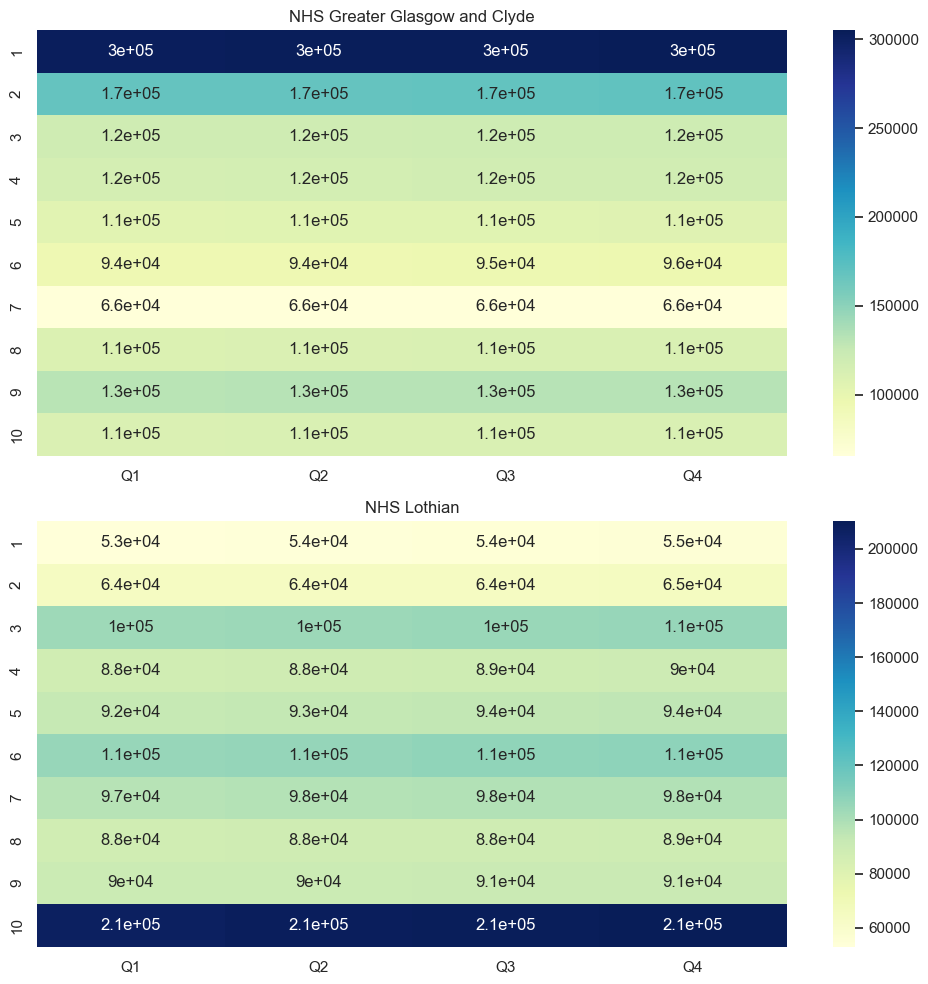

In [31]:
# Create an empty dictionary to store data for each region
data_by_region = {name: pd.DataFrame(index=[f'{i}' for i in range(1, 11)], 
                                     columns=['Q1', 'Q2', 'Q3', 'Q4']) for name in board_names}

# Populate the dictionary with data
for board_name in board_names:
    # Filter data for the current board name
    SIMD_HSCP = SIMD.loc[SIMD['Board'].str.startswith(board_name)]
    for year in years:
        for quarter in quarters:
            # Process the data for the specific board, year, and quarter
            result = process_SIMD_data(SIMD_HSCP, board_name, year, quarter)
            # If the result is not empty, update the dictionary with the patient data
            if not result.empty:
                data_by_region[board_name][f'Q{quarter}'] = result['Patients'].values

# Plotting the heatmaps
fig, axs = plt.subplots(len(board_names), 1, figsize=(10, 5 * len(board_names)), squeeze=False)
for i, (board_name, data) in enumerate(data_by_region.items()):
    # Create a heatmap for each region using seaborn
    sns.heatmap(data, ax=axs[i, 0], cmap="YlGnBu", annot=True)
    # Set the title for each subplot as the board name
    axs[i, 0].set_title(board_name)

# Adjust the layout to fit all subplots neatly
plt.tight_layout()
# Display the plots
plt.show()


### 4.3  SIMD Analysis in Glasgow and Lothian

**SIMD** is the Scottish Government's standard approach to identify areas of multiple deprivation in Scotland. It can help improve understanding about the outcomes and circumstances of people living in the most deprived areas in Scotland. It can also allow effective targeting of policies and funding where the aim is to wholly or partly tackle or take account of area concentrations of multiple deprivation. Here，we use SIMD ranks data zones from most deprived (ranked 1) to least deprived (ranked 10).

#### 4.3.1 Key Observations

1. **Stable Disease Prevalence Across SIMD Ranks**:
- In both Glasgow and Lothian, the number of disease cases in 2022 remained relatively stable across different SIMD ranks.

2. **Contrasting Disease Prevalence Patterns**:
- In Lothian, wealthier groups exhibited higher disease prevalence.
- In Glasgow, poorer groups showed higher disease prevalence.

#### 4.3.2 Contributing Factors

1. **Access to Healthcare and Disease Reporting**:
- Affluent communities often have better healthcare access, leading to more frequent disease reporting and detection.
- Economically deprived areas may lack sufficient medical resources, affecting disease treatment and monitoring.

2. **Population Density and Urbanization**:
- Wealthier, densely populated, and urbanized areas facilitate easier disease transmission due to increased human interaction.
- Environmental factors like pollution in affluent areas may contribute to health issues.

#### 4.3.3 Glasgow's Unique Health Challenges

1. **The "Glasgow Effect"**:
- Despite economic development, Glasgow experiences high mortality rates, particularly among adult men, often linked to drugs, alcohol, suicide, and violence.

2. **Historical and Social Factors**:
- Glasgow's industrial past led to overcrowded living conditions, impacting mental and physical health.
- Deindustrialization resulted in social and economic challenges, overshadowing lifestyle factors in explaining health issues.

3. **Cultural and Genetic Influences**:
- The erosion of traditional community values may increase mortality from substance abuse and violence.
- Researcher Harry Burns suggests a potential genetic influence, highlighting the role of epigenetics in health outcomes.



## 5 Analysis of Disease Rates in NHS Greater Glasgow and Clyde and NHS Lothian (2022)

This part focuses on analyzing the rates of various diseases in two specific NHS Health Boards in Scotland: NHS Greater Glasgow and Clyde, and NHS Lothian, for the year 2022. The analysis particularly emphasizes visualizing these rates using radar charts.

### 5.1 Data processing

- **Year and Area Filtering**: The data is filtered to focus on the year 2022 and specifically on NHS Greater Glasgow and Clyde and NHS Lothian.

- **DataFrames Creation**: Separate DataFrames are created for each health board to facilitate individual analysis.

- **Column Names Processing**: The column names representing diseases are extracted and cleaned to remove any prefixes, making them more readable and suitable for visualization.

### 5.2 Radar Chart Visualization

- **Function Definition**: A function `radar_plot` is defined to create radar charts for each city's (health board's) data. This function takes parameters like the DataFrame, colors for the chart, the title, and the Axes object.

- **Data Extraction and Transformation**: The function extracts the relevant data from the DataFrame, flattens it, and appends the first data point to the end to close the radar chart.

- **Angles Calculation**: It calculates the angles for each disease category in the radar chart.

- **Chart Customization**: The radar chart is filled with color, and labels, Y-axis ticks, and title are set for better readability and presentation.

### 5.3 Combined Radar Chart Creation

- **Figure Setup**: A figure with two subplots is created, one for each health board.

- **Radar Charts for Glasgow and Lothian**: The `radar_plot` function is used to plot the disease rates for Glasgow and Lothian in separate subplots.

- **Display**: The combined radar chart is displayed, showing a comparative view of disease rates in both health boards.

In [5]:
# Read data from the specified Excel file
file_url = "https://publichealthscotland.scot/media/21136/diseaseprevalence_board_total.xlsx"
df_total = pd.read_excel(file_url, sheet_name="DP_Board_total")

# Select rows for NHS Greater Glasgow and Clyde for all ages and the year 2022
selected_rows_Glasgow_2022 = df_total[(df_total["GPPractice/Area"] == "NHS Greater Glasgow and Clyde") & (df_total["Age"] == "All") & (df_total["Year"] == 2022)]
# Select rows for NHS Lothian for all ages and the year 2022
selected_rows_Lothian_2022 = df_total[(df_total["GPPractice/Area"] == "NHS Lothian") & (df_total["Age"] == "All") & (df_total["Year"] == 2022)]

# Store the selected rows as new DataFrames
new_df_total_2022_Glasgow = pd.DataFrame(selected_rows_Glasgow_2022)
new_df_total_2022_Lothian = pd.DataFrame(selected_rows_Lothian_2022)

# Extract column names representing diseases
disease = df_total.columns[44:63]

# Function to extract and clean disease names from column headers
def extract_disease_names(disease):
    disease_names = []
    for label in disease:
        # Remove the prefix "Rate_" from each column name
        clean_label = label.replace("Rate_", "")

        # Find the position of parentheses to extract abbreviation
        start = clean_label.find("(")
        end = clean_label.find(")")
        
        # If parentheses are found, extract the content within them
        if start != -1 and end != -1:
            # Only keep the content inside the parentheses
            clean_label = clean_label[start+1:end]

        # Add the processed name to the list
        disease_names.append(clean_label)

    # Return the list of cleaned disease names
    return disease_names

# Extract and print the cleaned disease names
disease_names = extract_disease_names(disease)

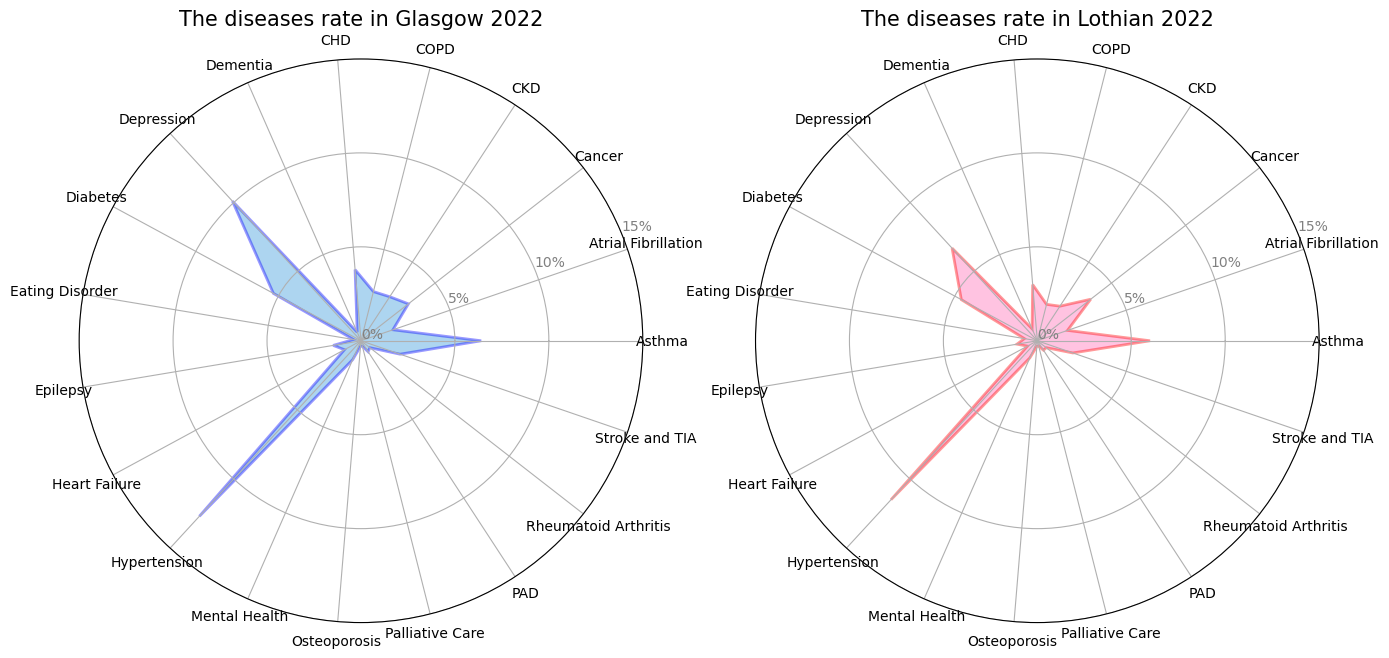

In [6]:
# Assuming 'disease_names' variable is defined elsewhere in your code

def radar_plot(df_city, inside_color, edgy_color, title, ax):
    """
    This function creates a radar chart for a given city's data.

    - df_city: DataFrame containing the city's data.
    - inside_color: Color for the inside of the radar chart.
    - edgy_color: Color for the edges of the radar chart.
    - title: Title of the radar chart.
    - ax: Axes object where the radar chart will be plotted.
    """

    # Extract the data to be plotted
    data = np.array(df_city.iloc[:, 44:63].values)
    flattened_data = data.flatten()

    # Append the first data point to the end to close the radar chart
    data = np.append(flattened_data, flattened_data[0])

    # Calculate the angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, len(disease_names), endpoint=False).tolist()
    angles += angles[:1]

    # Fill the area in the radar chart
    ax.fill(angles, data, color = inside_color, alpha = 0.4, edgecolor = edgy_color, linewidth=2)

    # Convert angles to degrees for labeling
    result = [x * 180 / np.pi for x in angles]

    # Set the labels for each axis in the radar chart
    ax.set_thetagrids(result[:-1], disease_names)
    # Set the range for the Y-axis
    ax.set_yticks([0, 5, 10, 15])
    ax.set_yticklabels(["0%", "5%", "10%", "15%"], color="grey")
    # Set the maximum value for the Y-axis
    ax.set_ylim(0, 15)

    # Set the title for the radar chart
    ax.set_title(title, position=(0.5, 1.1), fontsize=15)

# Create a figure with two subplots
plt.figure(figsize=(16, 8))

# First subplot for Glasgow
ax1 = plt.subplot(121, polar=True)
radar_plot(new_df_total_2022_Glasgow, '#3498db', 'b', "The diseases rate in Glasgow 2022", ax1)

# Second subplot for Lothian
ax2 = plt.subplot(122, polar=True)
radar_plot(new_df_total_2022_Lothian, '#ff69b4', 'r', "The diseases rate in Lothian 2022", ax2)

# Display the combined radar chart
plt.show()


### 5.4 Radar Chart Observations

**High Prevalence of Depression and Hypertension**: The radar charts for both NHS Greater Glasgow and Clyde and NHS Lothian show that depression and hypertension have the highest prevalence rates compared to other diseases.

### 5.5 Reasons for High Prevalence Rates

1. **Mental Health Awareness**:
Increased awareness and diagnosis of mental health issues, including depression, might also contribute to higher reported rates in these areas. Everyone attaches great importance to psychological problems and often goes to the hospital to check psychological conditions, so the prevalence is more。

2. **Social pressure**:
These two are relatively large cities in Scotland, so the social rhythm is faster, people are under greater pressure, so there are more people suffering from depression.

3. **Aging Population**:
Both regions have a significant proportion of an aging population, which is generally more prone to hypertension.

### 5.6 Conclusion

The radar chart analysis effectively highlighted depression and hypertension as key health concerns in Glasgow and Lothian. The subsequent detailed examination of these diseases across different age groups and genders will help in formulating more effective health policies and interventions tailored to the specific needs of these populations.

## 6 Analysis Depression and Hypertension in Glasgow and Lothian

After the analysis and visualization above, we choose to discuss the depression and hypertension in Glasgow and Lothian. Through the data analysis in this areas, we hope to gain insight into the prevalence, underlying factors, geographic distribution, and possible associations of depression and hypertension to provide valuable insights for improving public health policy and delivering better care.

### 6.1 Data processing


#### 6.1.1 Data Source
The code begins by importing the data from excel files hosted on the Public Health Scotland website . These files contain disease prevalence state seperated by gender ('LB_F' for female and 'LB_M' for male). 

#### 6.1.2 Key Features of the Script

1. **Data Loading and Filtering**:
  - Data is loaded using `pandas.read_excel`.  
  - Focus is specifically on data from the year 2022, filtering out other years.
  - Select basic demographic information and prevalence rates of various diseases.
  - Focus on specific regions: NHS Greater Glasgow and Clyde and NHS Lothian, which have the most patients and focus on depression and hypertension, which have the highest prevalence rate.
  - Remove the entries labeled by "All" in the age coloumn to focus on specific age groups.

2. **Data Visualization Preparation**:
  - Data preparation for Visualization: seperate the data('data' for females and `data1` for males), containing age, sex, and the rates of depression adn hypertension in both areas.
  - Conbine data for both gender: merge the data for females and males into a Dataframe(`concatenated_df`) for a comprehensive analysis across both genders.
  - Final Dataframe for Visualization: obtain `df` dataframe with age, sex and the rates of depression and hypertension for both regions for visualization.

3. **Visualization**
  - Set seaborn style to "darkgrid" and create subplots.
  - Plotting rate of depression and hypertension in Glasgow and Lothian seperately.
  - Rotate 45 degrees and align to the right for better readability and to prevent overlapping.
  - Use `plt.tight_layout()` to adjust the spacing between subplots for a clean layout without overlapping elements.



In [7]:
# Choose NHS Greater Glasgow and Clyde and NHS Lothian, which have the most patients
# Choose depression and hypertension, which have the highest prevalence rate
## Plot the rates against age and sex
## Get the data of male and female
LB_F = pd.read_excel('https://publichealthscotland.scot/media/21134/diseaseprevalence_board_f.xlsx', sheet_name = 'DP_Board_F')
LB_M = pd.read_excel('https://publichealthscotland.scot/media/21135/diseaseprevalence_board_m.xlsx', sheet_name = 'DP_Board_M')

## Get the date in 2022
LB_F_2022 =  LB_F.loc[LB_F['Year'] == 2022]
LB_M_2022 =  LB_M.loc[LB_M['Year'] == 2022]

## Get the prevalence of diseases
LB_F_2022_rate = LB_F_2022.iloc[:,list(range(5)) + list(range(44, 63))]
LB_M_2022_rate = LB_M_2022.iloc[:,list(range(5)) + list(range(44, 63))]

## Get the data of two boards metioned before
LB_F_2022_rate_board = LB_F_2022_rate.loc[LB_F_2022_rate['GPPractice/Area'] == 'NHS Greater Glasgow and Clyde']
LB_F_2022_rate_board1 = LB_F_2022_rate.loc[LB_F_2022_rate['GPPractice/Area'] == 'NHS Lothian']
LB_M_2022_rate_board = LB_M_2022_rate.loc[LB_M_2022_rate['GPPractice/Area'] == 'NHS Greater Glasgow and Clyde']
LB_M_2022_rate_board1 = LB_M_2022_rate.loc[LB_M_2022_rate['GPPractice/Area'] == 'NHS Lothian']

## Remove the 'all' in Age column
LB_F_2022_rate_board = LB_F_2022_rate_board.loc[LB_F_2022_rate_board['Age'] != "All"].reset_index(drop=True)
LB_F_2022_rate_board1 = LB_F_2022_rate_board1.loc[LB_F_2022_rate_board1['Age'] != "All"].reset_index(drop=True)
LB_M_2022_rate_board = LB_M_2022_rate_board.loc[LB_M_2022_rate_board['Age'] != "All"].reset_index(drop=True)
LB_M_2022_rate_board1 = LB_M_2022_rate_board1.loc[LB_M_2022_rate_board1['Age'] != "All"].reset_index(drop=True)

## Construct a dataframe for plotting
data = {
    "Age" : LB_F_2022_rate_board["Age"],
    "Sex" : LB_F_2022_rate_board["Sex"],
    "Rate of Depression in Glasgow" : LB_F_2022_rate_board["Rate_Depression"],
    "Rate of Depression in Lothian" : LB_F_2022_rate_board1["Rate_Depression"],
    "Rate of Hypertension in Glasgow" : LB_F_2022_rate_board["Rate_Hypertension"],
    "Rate of Hypertension in Lothian" : LB_F_2022_rate_board1["Rate_Hypertension"]
}

data1 = {
    "Age" : LB_F_2022_rate_board["Age"],
    "Sex" : LB_M_2022_rate_board["Sex"],
    "Rate of Depression in Glasgow" : LB_M_2022_rate_board["Rate_Depression"],
    "Rate of Depression in Lothian" : LB_M_2022_rate_board1["Rate_Depression"],
    "Rate of Hypertension in Glasgow" : LB_M_2022_rate_board["Rate_Hypertension"],
    "Rate of Hypertension in Lothian" : LB_M_2022_rate_board1["Rate_Hypertension"]
}

df = pd.DataFrame(data)
df1 = pd.DataFrame(data1)
# Concatenate two DataFrames along rows (axis=0)
concatenated_df = pd.concat([df, df1], axis=0, ignore_index=True)
df = concatenated_df

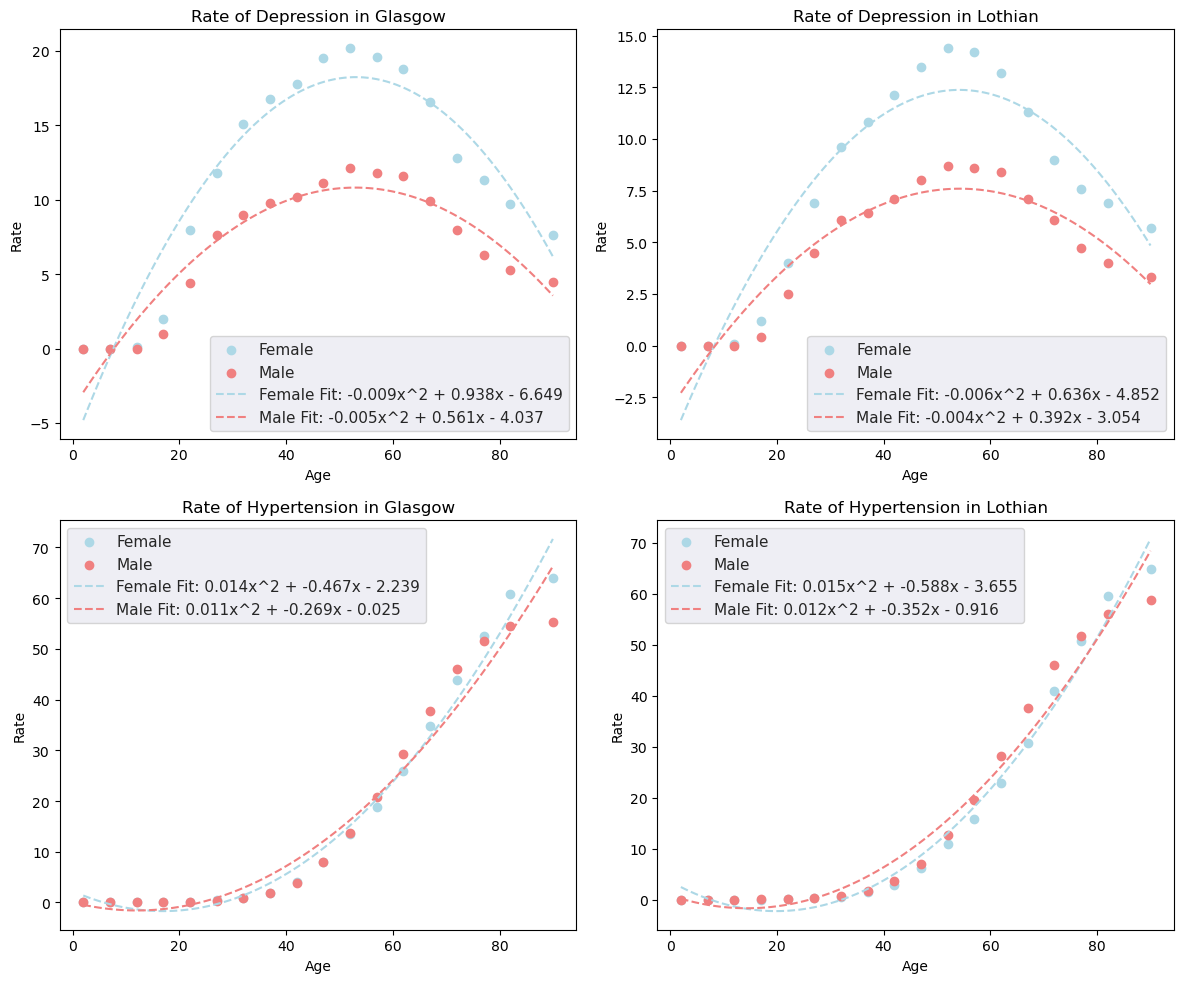

In [8]:
def plot_polynomial_curve(ax, age_mid, rate, title):
    """
    Plot polynomial curve on a given axis.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
    - age_mid (numpy.ndarray): Midpoint ages.
    - rate (numpy.ndarray): Rates of the variable.
    - title (str): Title of the subplot.
    """
    # Separate rates for females and males
    rate_f = rate[0:18]
    rate_m = rate[18:,]

    # Scatter plot for females and males
    ax.scatter(age_mid, rate_f, label="Female", color='lightblue')
    ax.scatter(age_mid, rate_m, label="Male", color='lightcoral')
    
    # Reshape age for polynomial features
    age_reshaped = age_mid.reshape(-1, 1)
    
    # Create polynomial features of degree 2
    poly_features = PolynomialFeatures(degree=2)
    age_poly = poly_features.fit_transform(age_reshaped)

    # Create linear regression models for females and males
    model = LinearRegression()
    model1 = LinearRegression()
    model.fit(age_poly, rate_f)
    model1.fit(age_poly, rate_m)
    
    # Generate x values for smooth curve
    x_values = np.linspace(min(age_mid), max(age_mid), 100).reshape(-1, 1)
    x_poly = poly_features.transform(x_values)
    
    # Predictions for females and males
    y_pred = model.predict(x_poly)
    y_pred1 = model1.predict(x_poly)
    
    # Set the style of seaborn
    sns.set(style="darkgrid")
    
    # Plot the fitted curves with labels
    ax.plot(x_values, y_pred, color='lightblue', 
        label=f'Female Fit: {model.coef_[2]:.3f}x^2 + {model.coef_[1]:.3f}x - {abs(model.intercept_):.3f}', linestyle='dashed')
    ax.plot(x_values, y_pred1, color='lightcoral', 
        label=f'Male Fit: {model1.coef_[2]:.3f}x^2 + {model1.coef_[1]:.3f}x - {abs(model1.intercept_):.3f}', linestyle='dashed')

    # Set labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Rate')
    ax.set_title(title)
    
    # Display legend
    ax.legend()

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

age_ranges = [
    "00-04", "05-09", "10-14", "15-19", "20-24",
    "25-29", "30-34", "35-39", "40-44", "45-49",
    "50-54", "55-59", "60-64", "65-69", "70-74",
    "75-79", "80-84", "85plus"
]

age_mid = np.array([2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 90])  # Assuming 85plus is represented by 90

# Plot each subplot
plot_polynomial_curve(axs[0, 0], age_mid, np.array(df['Rate of Depression in Glasgow']), 'Rate of Depression in Glasgow')
plot_polynomial_curve(axs[0, 1], age_mid, np.array(df['Rate of Depression in Lothian']), 'Rate of Depression in Lothian')
plot_polynomial_curve(axs[1, 0], age_mid, np.array(df['Rate of Hypertension in Glasgow']), 'Rate of Hypertension in Glasgow')
plot_polynomial_curve(axs[1, 1], age_mid, np.array(df['Rate of Hypertension in Lothian']), 'Rate of Hypertension in Lothian')

# Adjust layout
plt.tight_layout()
plt.show()

### 6.2 Results and Reason Analysis

#### 6.2.1 Results analysis

1. **Depression in Glasgow and Lothian**: 
  - Females show higher depression rates than males, peaking in the 50-54 age bracket in Glasgow and 45-49 in Lothian.
  - Male depression rates peak later (around 55-59) and decrease more gradually.

2. **Hypertension in Glasgow and Lothian**: 
  - A steady increase in hypertension with age in both sexes, with a slightly higher rate in males post-70 in Glasgow.
  - In Lothian, female hypertension rates surpass males in the 65-69 age group and remain higher.

#### 6.2.2 Reasons analysis

1. **Depression in Glasgow and Lothian**: 

- **Age Factors**: Both men and women may face more life pressures in middle age (ages 50-54 or 45-49), such as family responsibilities and career pressures, leading to an increased risk of depression.

-  **Sex Factors**: Differences in hormones and physiology can affect the prevalence of certain diseases between sexes. For example, hormonal changes can play a role in depression, particularly among females.

2. **Hypertension in Glasgow and Lothian**: 

- **Age Factors**: Hypertension in both sexes showed a steady increase with age. This may be due in part to natural changes in blood vessel and heart function that occur with age.

To provide a more precise analysis of why these rates are higher, one would need to look at a more detailed set of data, including environmental, genetic, lifestyle, and healthcare access factors. Moreover, qualitative studies, patient interviews, and broader socio-economic data would be necessary to understand the complex interplay of factors that contribute to the prevalence of these conditions.


## 7 Conclusion

First we looked at the number of cases across different NHS health boards in Scotland, with a particular focus on Glasgow and the Lothian region, which showed the highest numbers of cases. 

We then delved into socioeconomic conditions in these regions, analyzing the SIMD index to understand the link between health status and socioeconomic factors. 

Map and radar tools were used to further analyze the major diseases and prevalence rates in these regions, especially depression and hypertension, which were particularly important in the analysis. 

Finally, the distribution of these diseases in different sex and age groups was also examined.

In conclusion, this comprehensive analysis of Scotland's public health landscape, through the lens of General Practitioner practices, unveils significant insights into the current state and challenges of healthcare delivery. 
